In [2]:
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import ruptures as rpt
from scipy.stats import linregress

# Set a consistent plotting style
plt.style.use('seaborn-v0_8-darkgrid')  
plt.rcParams['figure.figsize'] = [10, 6]  # Set a consistent figure size


def detect_change_points(data):
    model = "l1"
    algo = rpt.Binseg(model=model).fit(data)
    change_points = algo.predict(n_bkps=2)
    return change_points

def plot_msd(topo_file, traj_file, selection):
    u = mda.Universe(topo_file, traj_file)
    atom_selection = u.select_atoms(selection)
    
    msd = EinsteinMSD(atom_selection, select='all', msd_type='xyz', fft=True)
    msd.run()
    
    msd_values = msd.results.timeseries
    times = np.arange(len(msd_values)) * u.trajectory.dt * 1000  # convert from ps to ns
    
    # Filter the data to start from 0.5 ns
    s_time = 0.5  # 0.5 ns
    filtered_indices = (times > s_time)
    times_filtered = times[filtered_indices]
    msd_values_filtered = msd_values[filtered_indices]
    
    change_points = detect_change_points(msd_values_filtered)
    
    plt.figure()
    plt.plot(times_filtered, msd_values_filtered, label='MSD')
    plt.xlabel('Time (ns)')
    plt.ylabel('MSD ($Å^2$)')
    plt.title('Mean Squared Displacement')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.loglog(times_filtered, msd_values_filtered, label='MSD')
    plt.xlabel('Time (ns)')
    plt.ylabel('MSD ($Å^2$)')
    plt.title('Mean Squared Displacement (Log-Log)')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(times_filtered, msd_values_filtered, label='MSD')
    for cp in change_points[:-1]:
        plt.axvline(x=times_filtered[cp], color='r', linestyle='--')
    plt.xlabel('Time (ns)')
    plt.ylabel('MSD ($Å^2$)')
    plt.title('MSD with Change Points')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.loglog(times_filtered, msd_values_filtered, label='MSD')
    for cp in change_points[:-1]:
        plt.axvline(x=times_filtered[cp], color='r', linestyle='--')
    plt.xlabel('Time (ns)')
    plt.ylabel('MSD ($Å^2$)')
    plt.title('MSD with Change Points (Log-Log)')
    plt.legend()
    plt.show()
    
    return msd_values_filtered, times_filtered, change_points

100%|██████████| 324/324 [00:11<00:00, 27.18it/s]


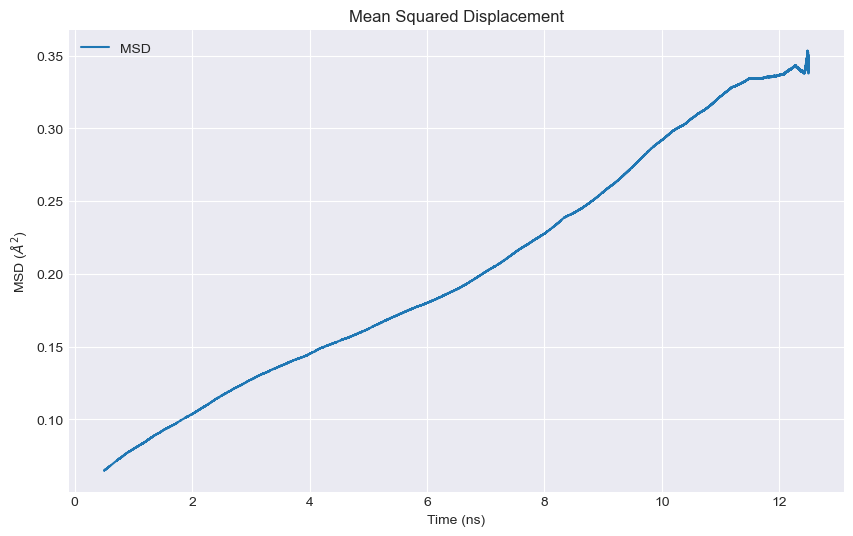

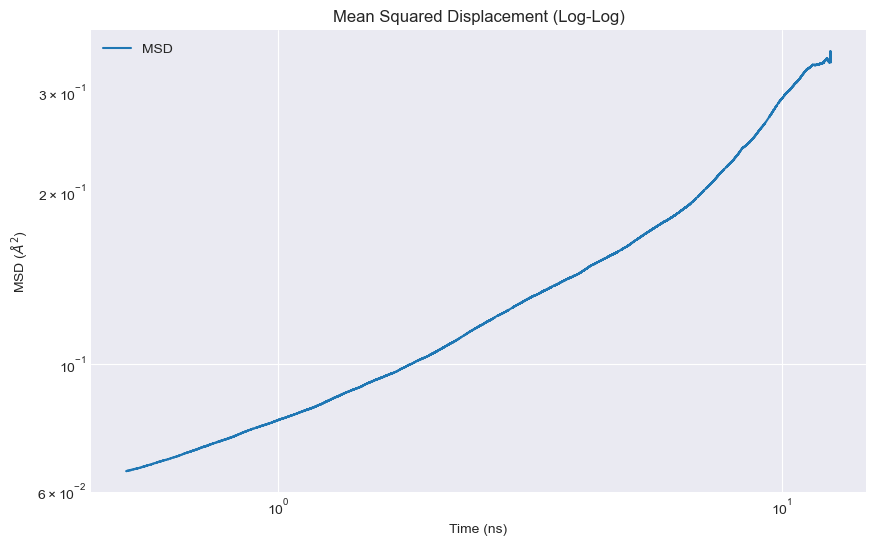

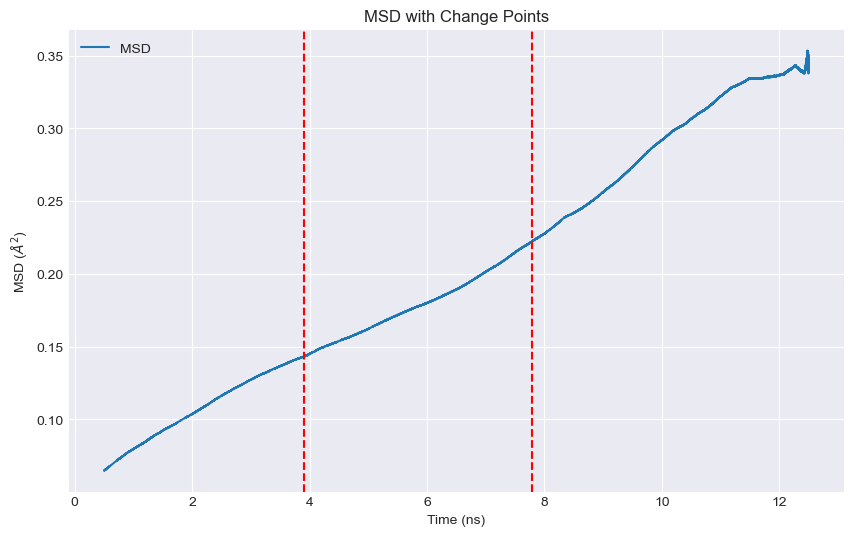

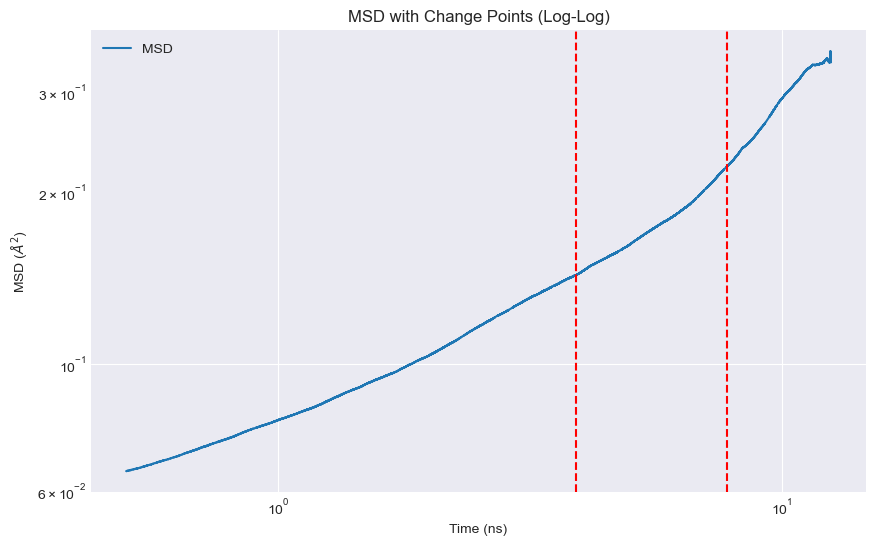

3.917550424681345e-11
3.265053592936048e-11


In [6]:
# LOWEST TEMP 66%

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\66\258_1001001001001_3.tpr', r'D:\Idun_run_1000\66\258_1001001001001_3.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)



100%|██████████| 324/324 [00:10<00:00, 29.56it/s]


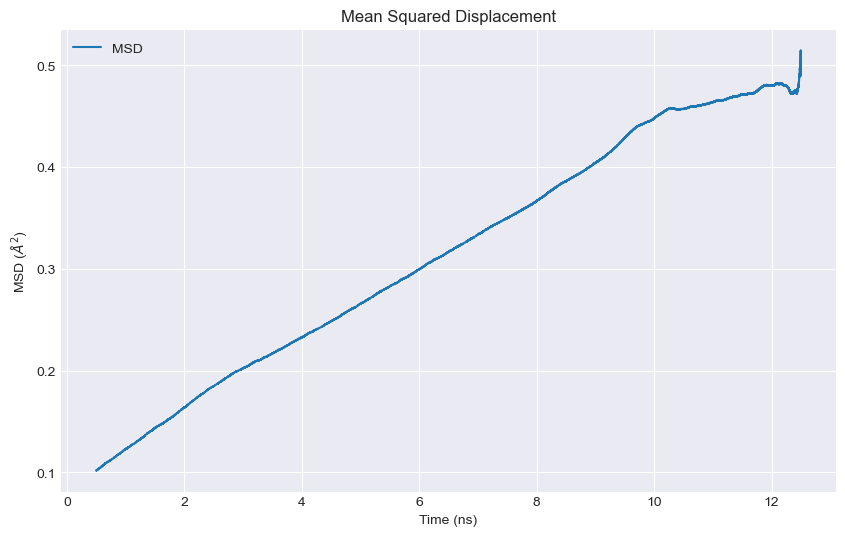

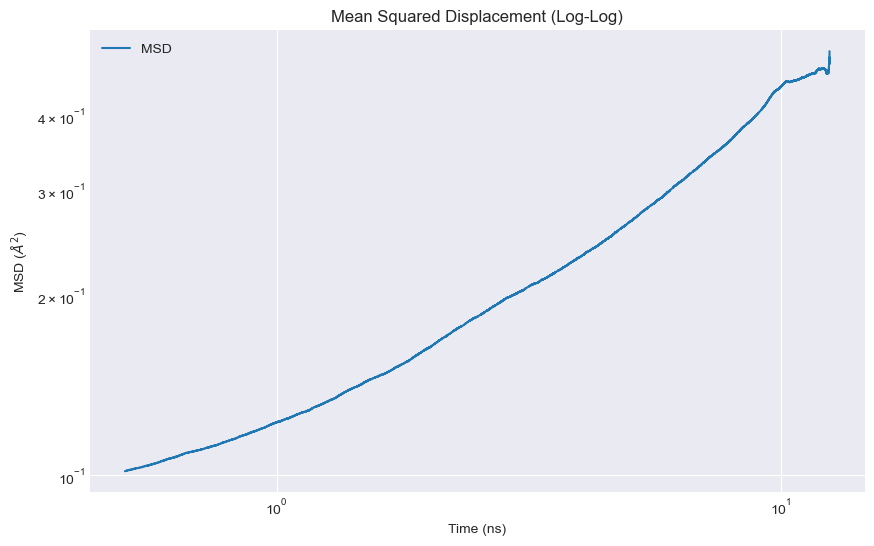

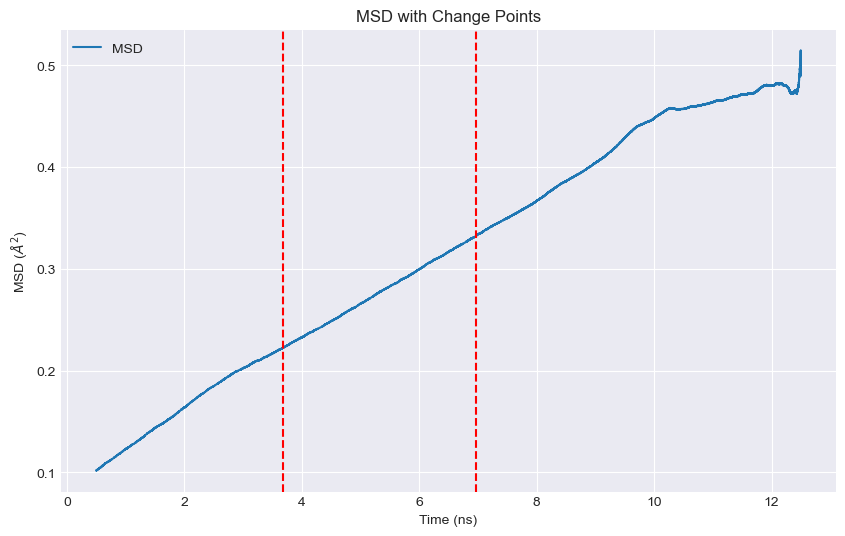

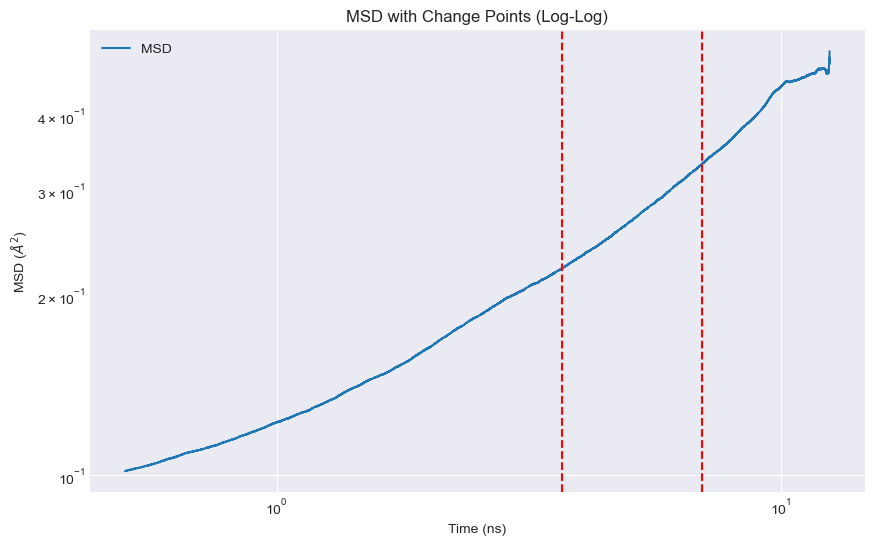

5.550645283631206e-11
5.616341010230948e-11


In [7]:
# HIGHEST TEMP 66%

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\66\358_0_3.tpr', r'D:\Idun_run_1000\66\358_0_3.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)



100%|██████████| 450/450 [00:16<00:00, 27.21it/s]


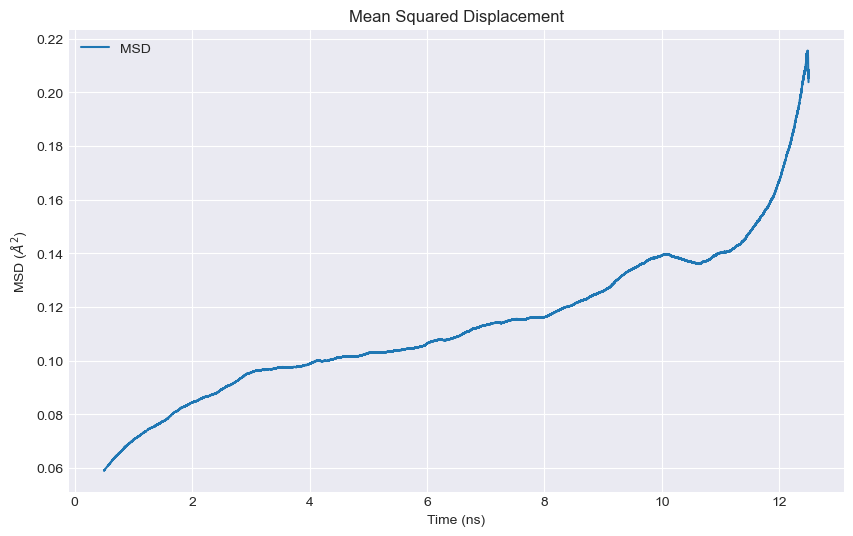

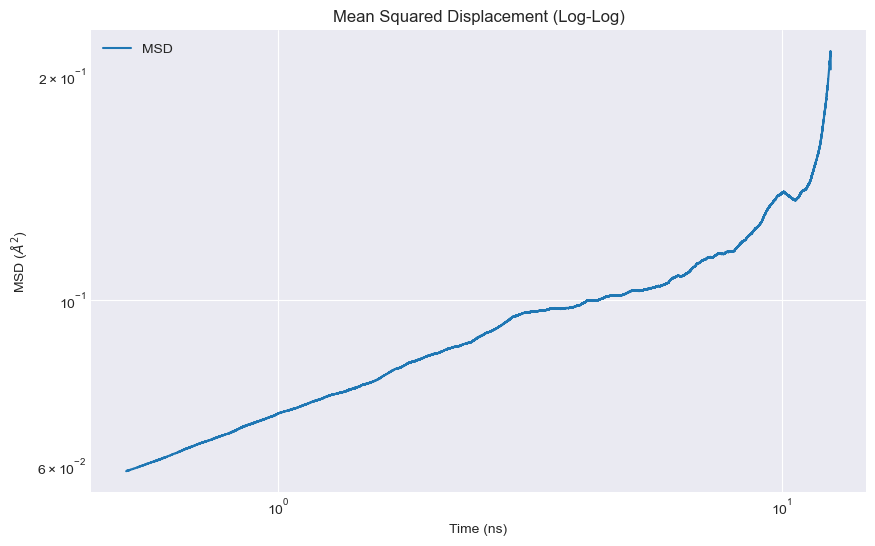

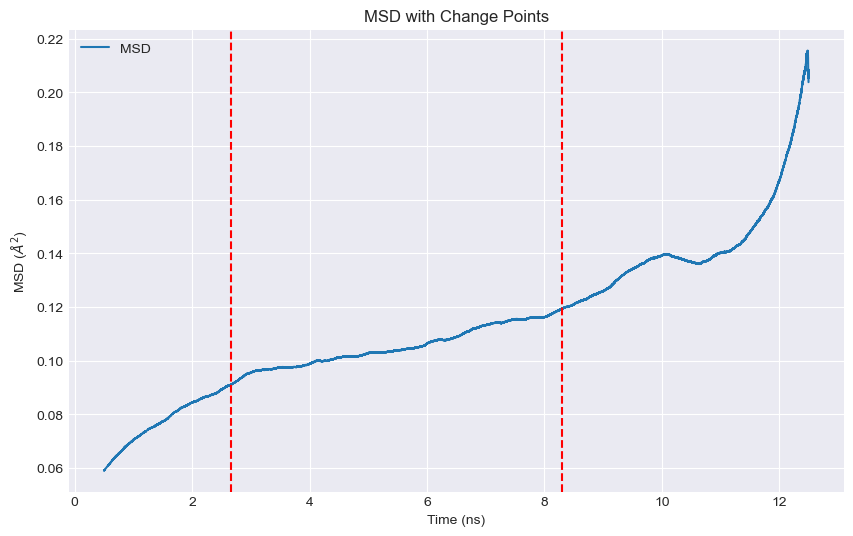

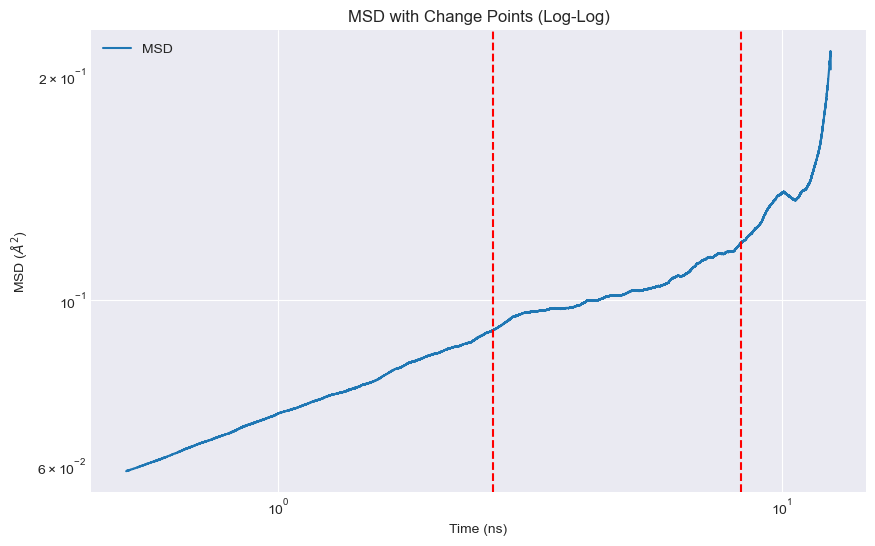

1.2458711361946613e-11
7.417525309202299e-12


In [8]:
# LOWEST TEMP 75%

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\75\258_2002002002002_2.tpr', r'D:\Idun_run_1000\75\258_2002002002002_2.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)



100%|██████████| 450/450 [00:16<00:00, 26.57it/s]


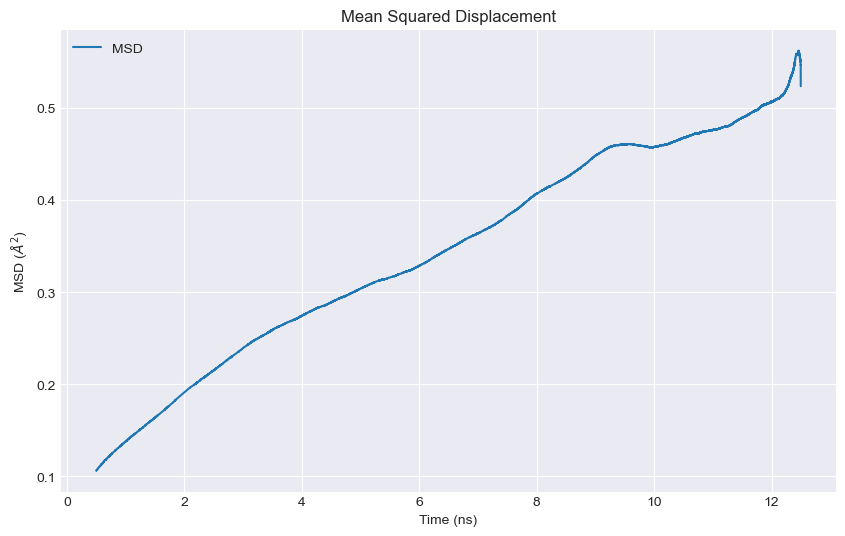

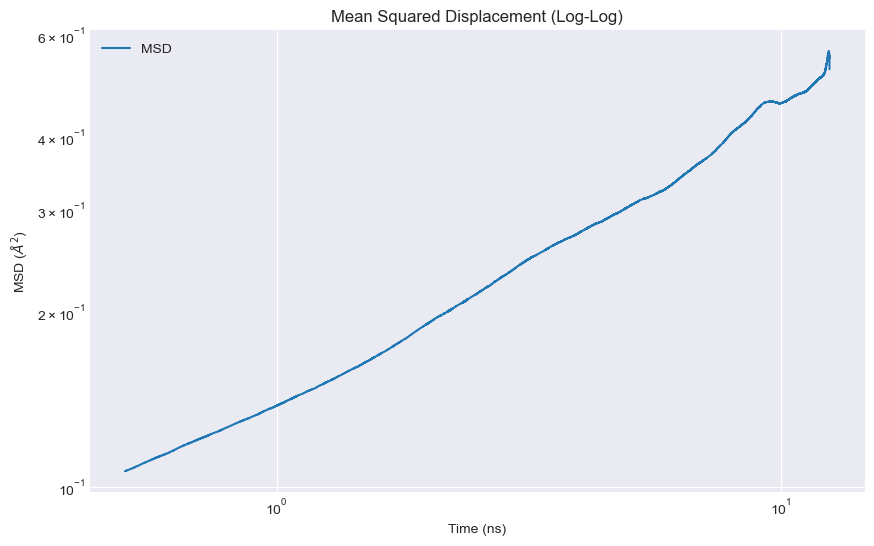

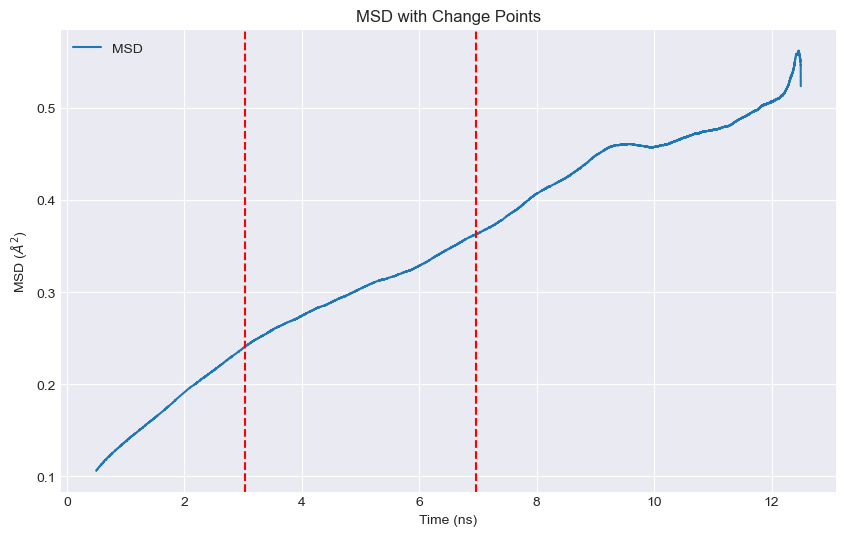

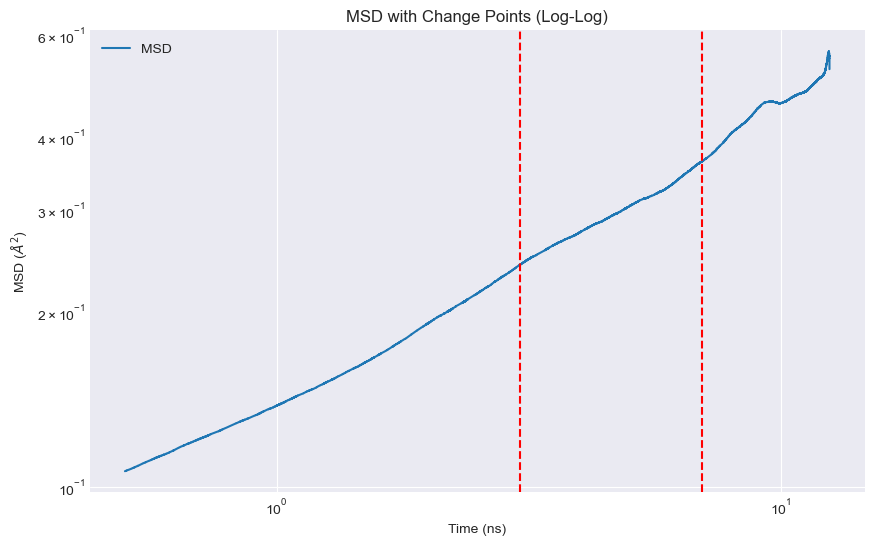

5.517631796114156e-11
4.8748535591577564e-11


In [9]:
# HIGHEST TEMP 75%

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\75\357_7997997997998_2.tpr', r'D:\Idun_run_1000\75\357_7997997997998_2.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)



100%|██████████| 600/600 [00:24<00:00, 24.53it/s]


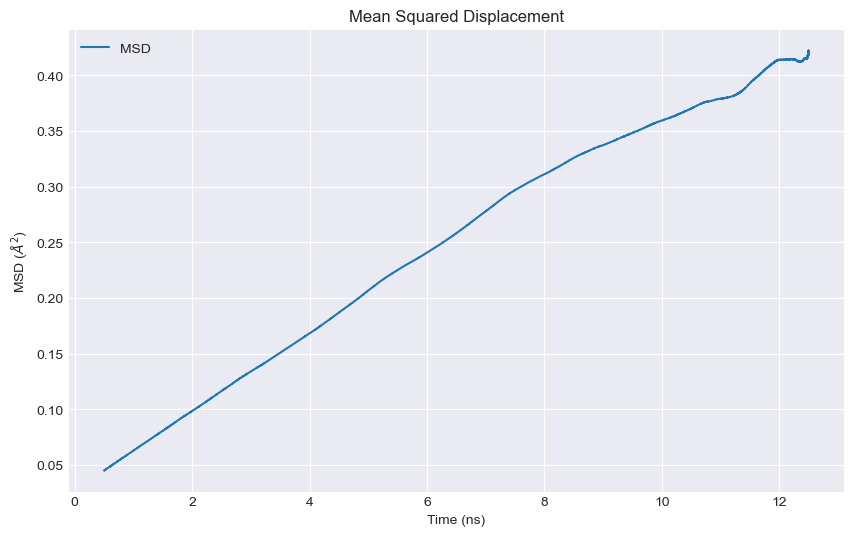

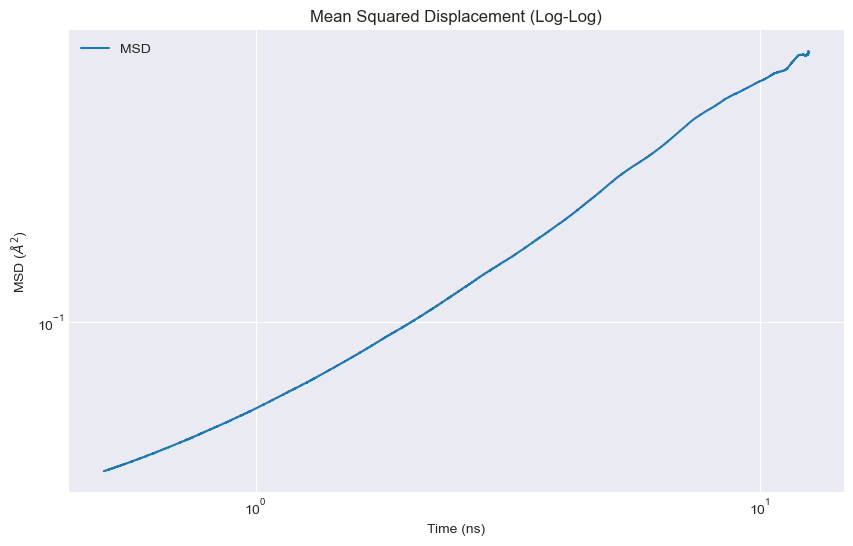

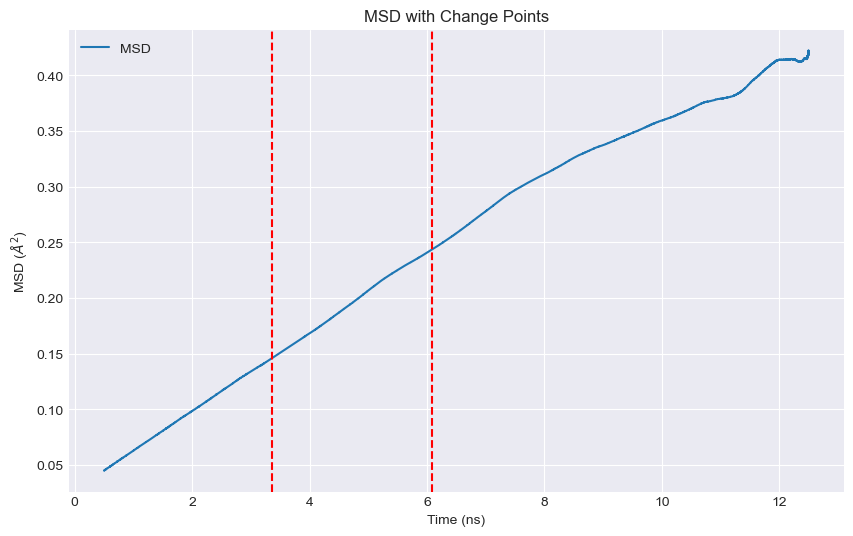

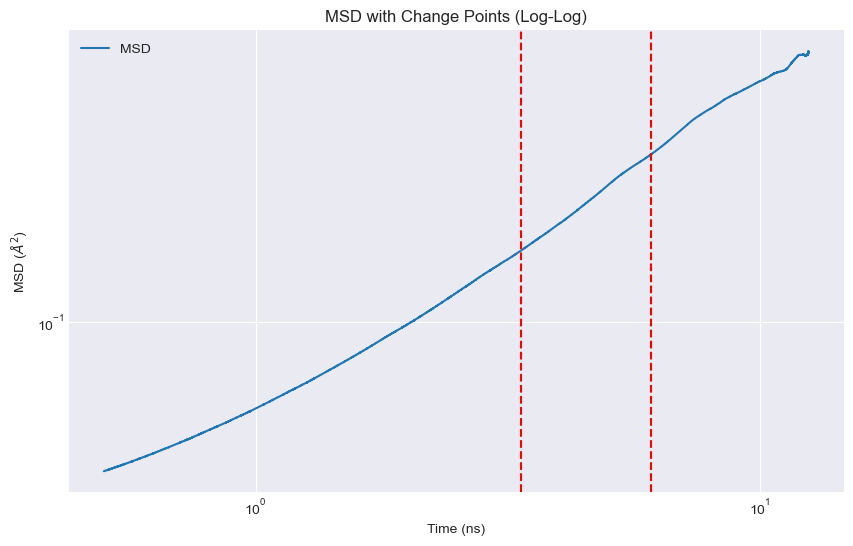

5.309768168965931e-11
6.143837734241406e-11


In [10]:
# LOWEST TEMP 100%

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\100\258_0_1.tpr', r'D:\Idun_run_1000\100\258_0_1.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)



100%|██████████| 600/600 [00:24<00:00, 24.84it/s]


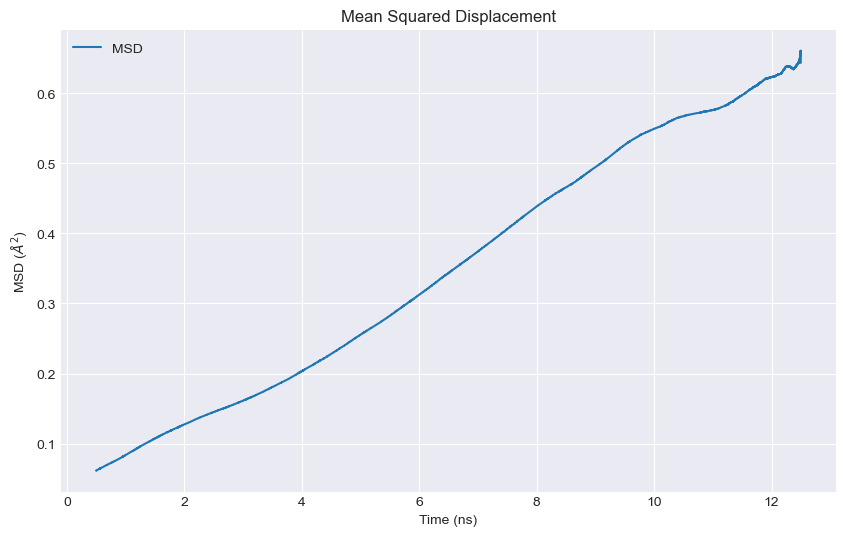

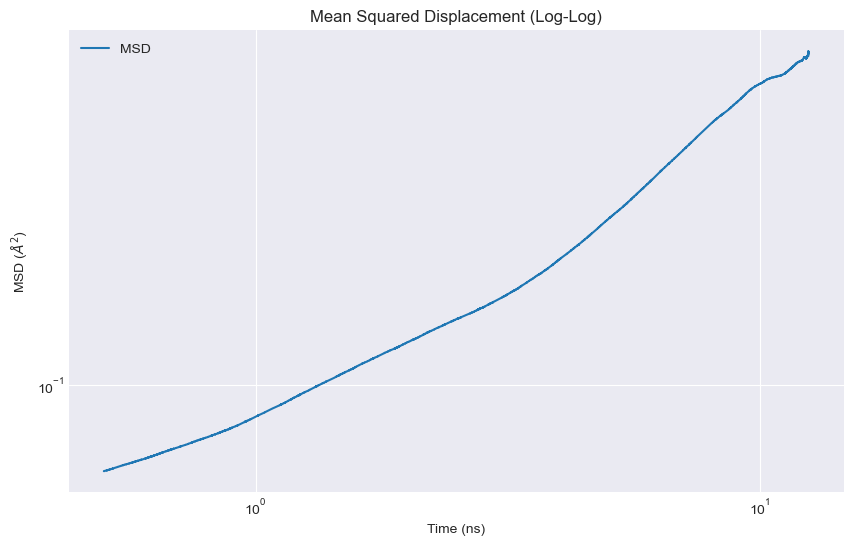

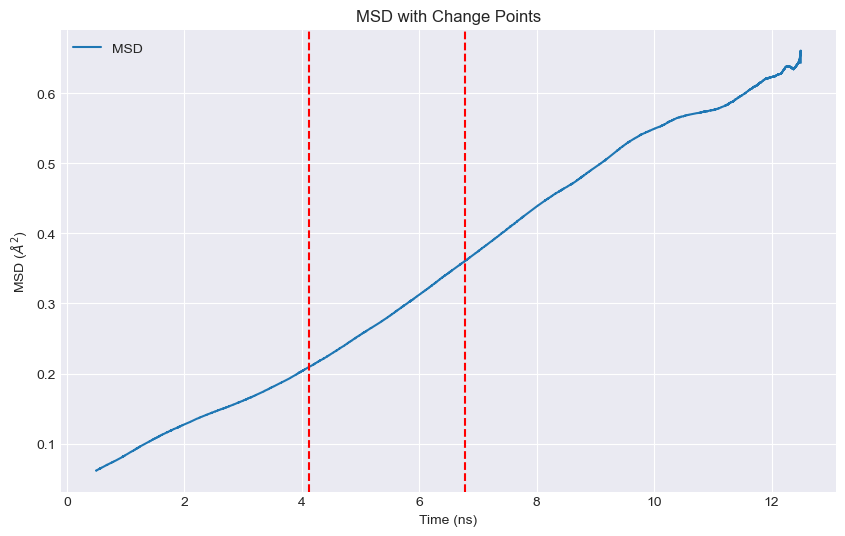

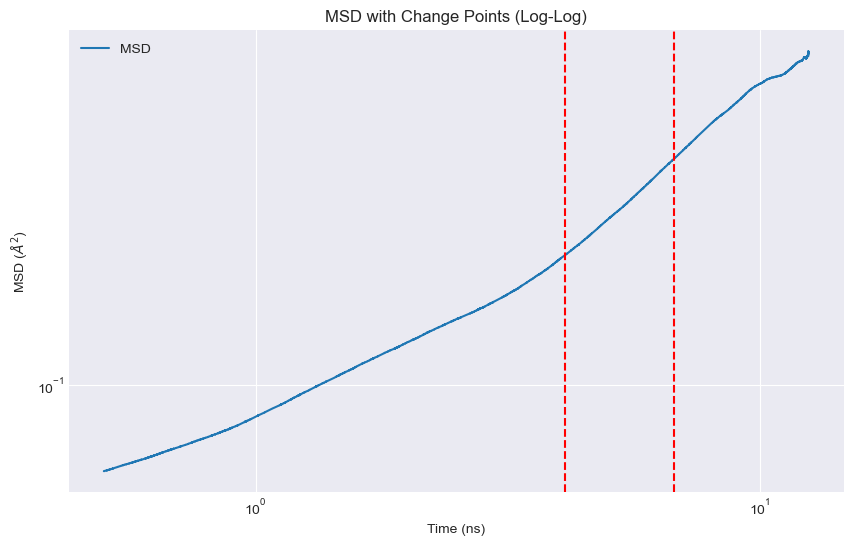

8.600329450371388e-11
9.548951120942488e-11


In [11]:
# HIGHEST TEMP 100%

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\100\357_8998998998999_1.tpr', r'D:\Idun_run_1000\100\357_8998998998999_1.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)



100%|██████████| 324/324 [00:12<00:00, 25.25it/s]


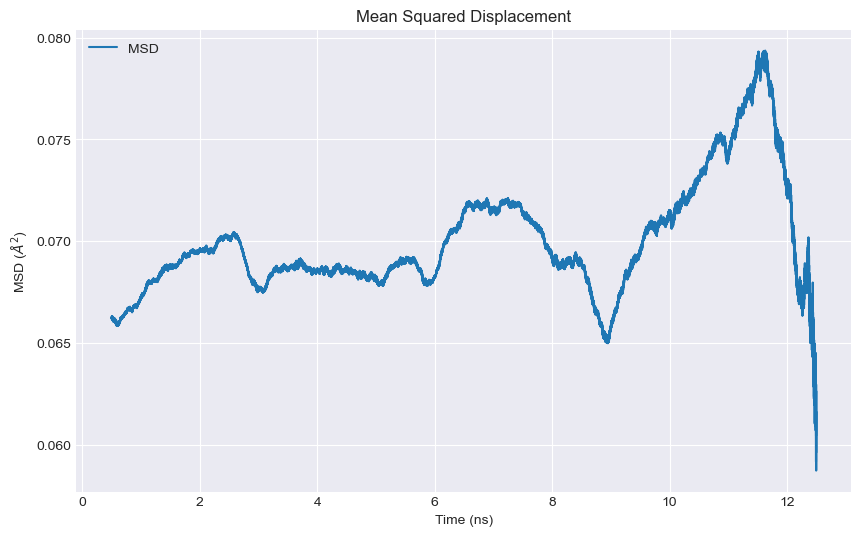

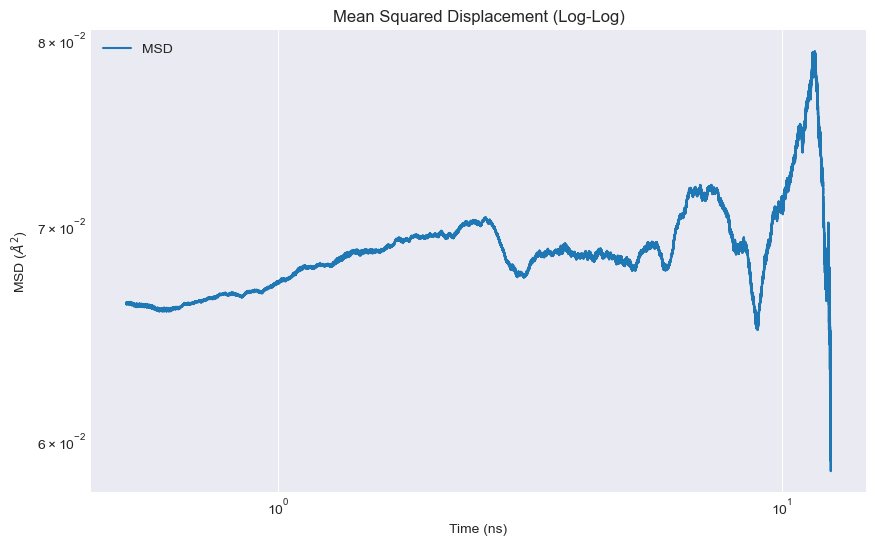

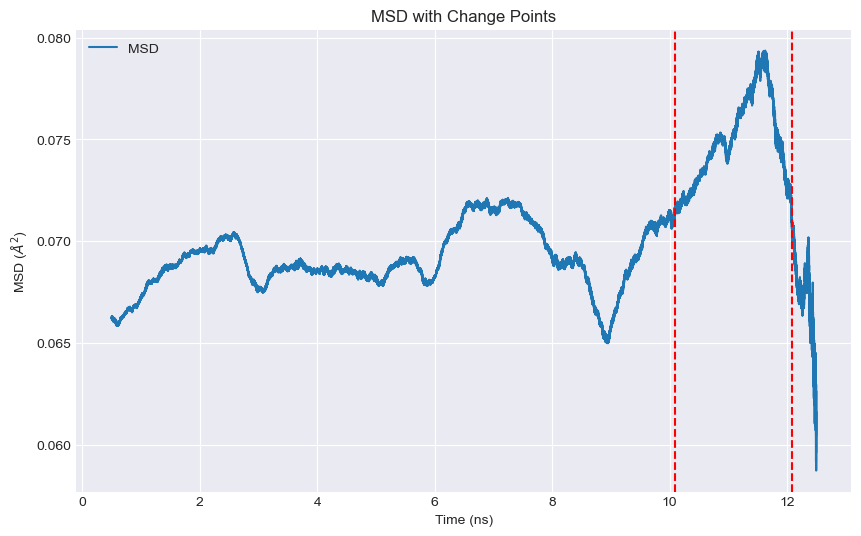

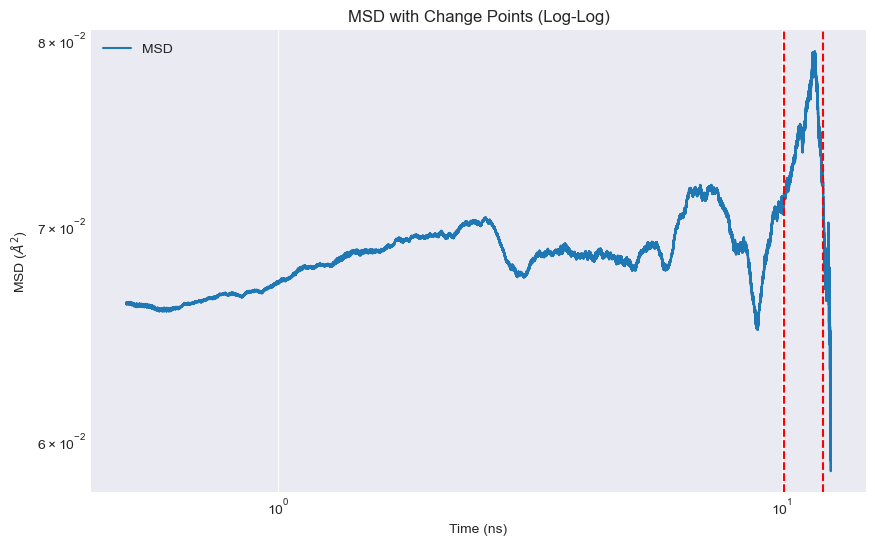

7.286228064424333e-13
0.2993639281173821
3.7348525771490995e-12
0.35200694931581344


In [4]:
# OUTLIER RUN

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\66\353_7957957957958_3.tpr', r'D:\Idun_run_1000\66\353_7957957957958_3.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)
print(r_value**2)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)
print(r_value_cp**2)


100%|██████████| 600/600 [00:24<00:00, 24.74it/s]


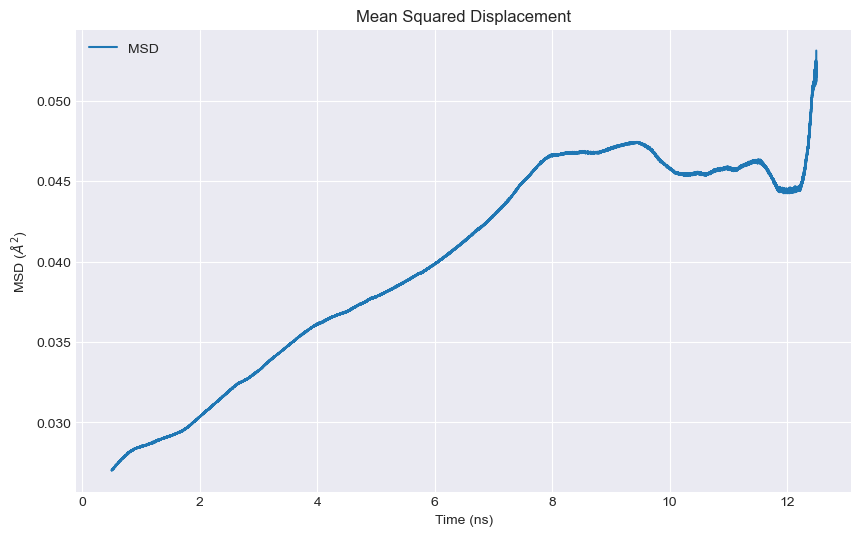

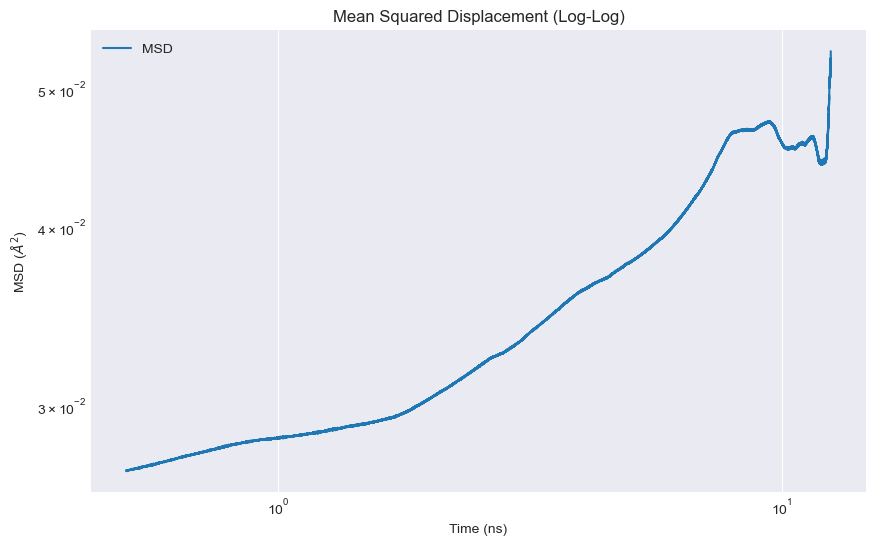

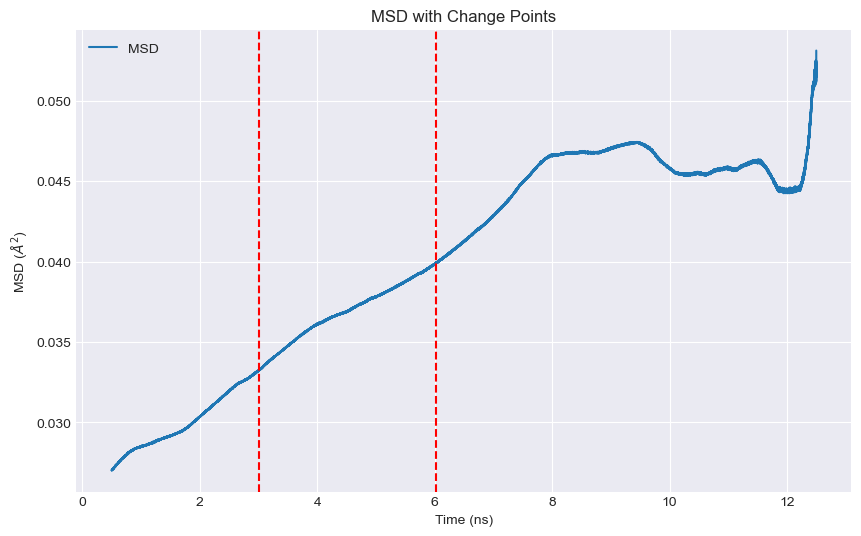

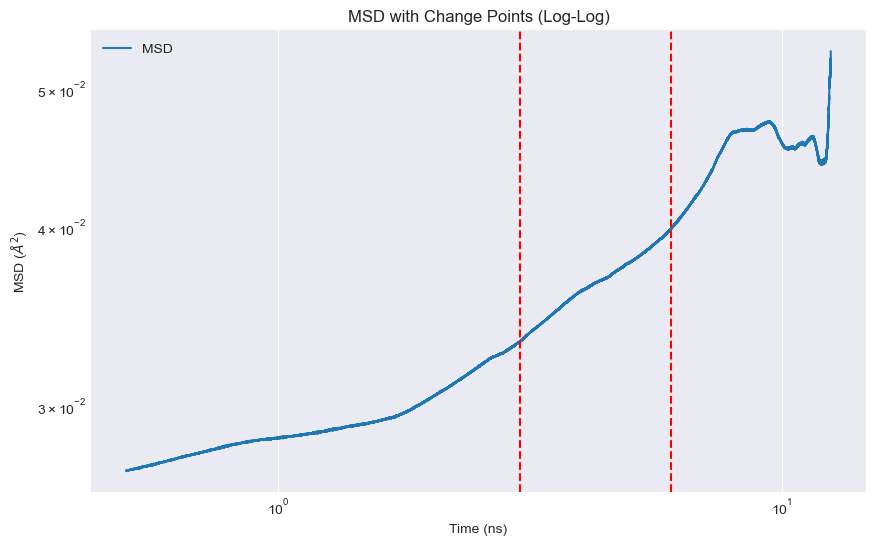

2.9317522598600765e-12
0.8855527134336578
3.391200946903656e-12
0.9896726543940352


In [3]:
# CP NECCESARY RUN

msd_, times_, change_points_ = plot_msd(r'D:\Idun_run_1000\100\262_1041041041041_1.tpr', r'D:\Idun_run_1000\100\262_1041041041041_1.xtc', 'name Li')

slope, intercept, r_value, p_value, std_err = linregress(times_, msd_)
D = slope / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D)
print(r_value**2)

cp1, cp2 = change_points_[:2]
times_filtered_cp = times_[cp1:cp2]
msd_filtered_cp = msd_[cp1:cp2]
slope_cp, intercept_cp, r_value_cp, p_value_cp, std_err_cp = linregress(times_filtered_cp, msd_filtered_cp)
D_cp = slope_cp / (2 * 3) * 1e-20 / 1e-12  # m^2/s
print(D_cp)
print(r_value_cp**2)